In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot, init_notebook_mode
## Trasforming df into cufflinks for iPlot
import cufflinks
cufflinks.go_offline(connected= True)
init_notebook_mode(connected= True)

In [21]:
covid19 = pd.read_csv ('https://raw.githubusercontent.com/ammishra08/COVID-19/master/covid_19_datasets/covid_19_globaldata/covid_19_world.csv')

In [22]:
covid19

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
27161,27162,05/20/2020,Yucatan,Mexico,2020-05-21 02:32:48,1244.0,97.0,797.0
27162,27163,05/20/2020,Yukon,Canada,2020-05-21 02:32:48,11.0,0.0,11.0
27163,27164,05/20/2020,Yunnan,Mainland China,2020-05-21 02:32:48,185.0,2.0,183.0
27164,27165,05/20/2020,Zacatecas,Mexico,2020-05-21 02:32:48,212.0,27.0,134.0


### Data Manipulation 

In [23]:
covid19['ObservationDate'] = pd.to_datetime(covid19['ObservationDate'])

In [24]:
covid19.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [25]:
covid_datewise = covid19.groupby(['ObservationDate']).agg({'Confirmed':'sum', 'Deaths':'sum', 'Recovered':'sum'})

In [26]:
covid_datewise.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


In [27]:
covid_datewise['Active'] = covid_datewise['Confirmed'] - covid_datewise['Deaths'] - covid_datewise['Recovered']

In [28]:
covid_datewise.head()

,Confirmed,Deaths,Recovered,Active
ObservationDate,,,,
2020-01-22,555.0,17.0,28.0,510.0
2020-01-23,653.0,18.0,30.0,605.0
2020-01-24,941.0,26.0,36.0,879.0
2020-01-25,1438.0,42.0,39.0,1357.0
2020-01-26,2118.0,56.0,52.0,2010.0


In [29]:
covid_datewise.iplot()

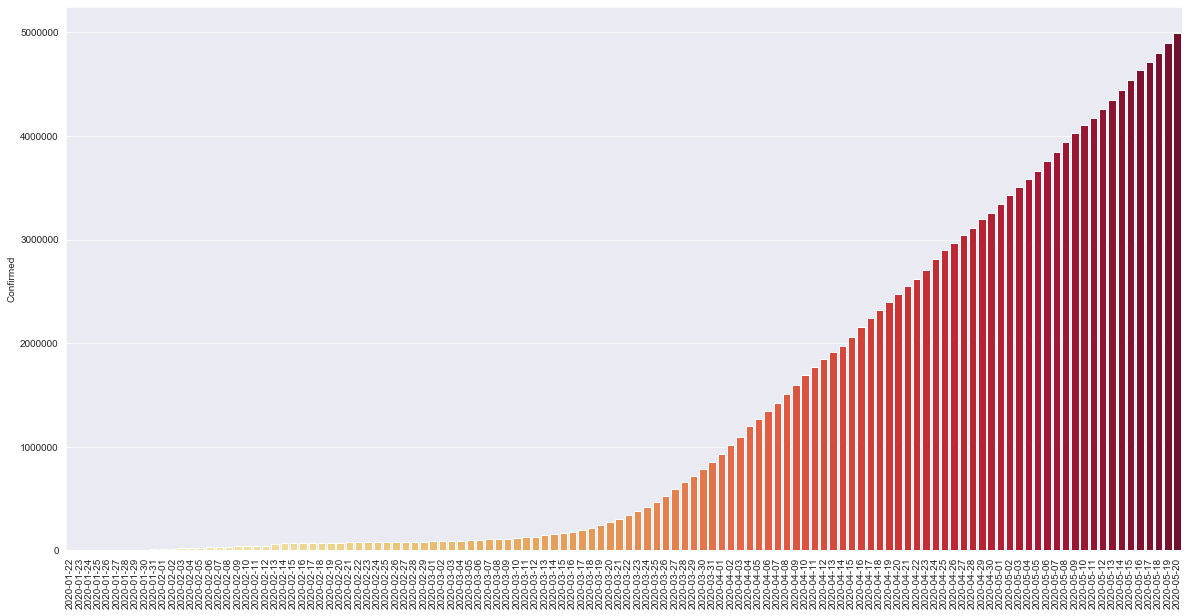

In [30]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
sns.barplot(x = covid_datewise.index.date, y = covid_datewise['Confirmed'], palette='YlOrRd')
plt.xticks(rotation = 90)
plt.show()

### Mortality Rate 

In [31]:
covid_datewise['Mortality Rate'] = (covid_datewise['Deaths'] / covid_datewise['Confirmed'])*100

In [32]:
covid_datewise[['Mortality Rate']].iplot()

### Linear Regression 

In [33]:
covid_datewise ['Days'] = covid_datewise.index - covid_datewise.index[0]

In [34]:
covid_datewise

,Confirmed,Deaths,Recovered,Active,Mortality Rate,Days
ObservationDate,,,,,,
2020-01-22,555.0,17.0,28.0,510.0,3.063063,0 days
2020-01-23,653.0,18.0,30.0,605.0,2.756508,1 days
2020-01-24,941.0,26.0,36.0,879.0,2.763018,2 days
2020-01-25,1438.0,42.0,39.0,1357.0,2.920723,3 days
2020-01-26,2118.0,56.0,52.0,2010.0,2.644004,4 days
...,...,...,...,...,...,...
2020-05-16,4634068.0,311781.0,1693197.0,2629090.0,6.728020,115 days
2020-05-17,4713620.0,315185.0,1733963.0,2664472.0,6.686687,116 days
2020-05-18,4801943.0,318481.0,1786875.0,2696587.0,6.632336,117 days


In [35]:
covid_datewise.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2020-01-22 to 2020-05-20
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Confirmed       120 non-null    float64        
 1   Deaths          120 non-null    float64        
 2   Recovered       120 non-null    float64        
 3   Active          120 non-null    float64        
 4   Mortality Rate  120 non-null    float64        
 5   Days            120 non-null    timedelta64[ns]
dtypes: float64(5), timedelta64[ns](1)
memory usage: 6.6 KB


In [36]:
covid_datewise ['Days'] = covid_datewise['Days'].dt.days

In [37]:
covid_datewise

,Confirmed,Deaths,Recovered,Active,Mortality Rate,Days
ObservationDate,,,,,,
2020-01-22,555.0,17.0,28.0,510.0,3.063063,0
2020-01-23,653.0,18.0,30.0,605.0,2.756508,1
2020-01-24,941.0,26.0,36.0,879.0,2.763018,2
2020-01-25,1438.0,42.0,39.0,1357.0,2.920723,3
2020-01-26,2118.0,56.0,52.0,2010.0,2.644004,4
...,...,...,...,...,...,...
2020-05-16,4634068.0,311781.0,1693197.0,2629090.0,6.728020,115
2020-05-17,4713620.0,315185.0,1733963.0,2664472.0,6.686687,116
2020-05-18,4801943.0,318481.0,1786875.0,2696587.0,6.632336,117


In [38]:
## First 90 % rows for training 
train_ml = covid_datewise.iloc [: int(covid_datewise.shape[0]*.90)]

In [39]:
train_ml

,Confirmed,Deaths,Recovered,Active,Mortality Rate,Days
ObservationDate,,,,,,
2020-01-22,555.0,17.0,28.0,510.0,3.063063,0
2020-01-23,653.0,18.0,30.0,605.0,2.756508,1
2020-01-24,941.0,26.0,36.0,879.0,2.763018,2
2020-01-25,1438.0,42.0,39.0,1357.0,2.920723,3
2020-01-26,2118.0,56.0,52.0,2010.0,2.644004,4
...,...,...,...,...,...,...
2020-05-04,3583055.0,251537.0,1162724.0,2168794.0,7.020182,103
2020-05-05,3662691.0,257239.0,1198832.0,2206620.0,7.023224,104
2020-05-06,3755341.0,263831.0,1245413.0,2246097.0,7.025487,105


In [40]:
test_ml = covid_datewise.iloc [int(covid_datewise.shape[0]*.90):]

In [41]:
test_ml.shape

(12, 6)

In [42]:
train_ml.shape

(108, 6)

In [43]:
## Linear Regression 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(normalize= True)

In [44]:
X = np.array(train_ml['Days']).reshape(-1,1)

In [45]:
Y = np.array(train_ml['Confirmed']).reshape(-1,1)

In [46]:
X

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [47]:
Y

array([[5.550000e+02],
       [6.530000e+02],
       [9.410000e+02],
       [1.438000e+03],
       [2.118000e+03],
       [2.927000e+03],
       [5.578000e+03],
       [6.165000e+03],
       [8.235000e+03],
       [9.925000e+03],
       [1.203800e+04],
       [1.678700e+04],
       [1.988100e+04],
       [2.389200e+04],
       [2.763600e+04],
       [3.081800e+04],
       [3.439200e+04],
       [3.712100e+04],
       [4.015100e+04],
       [4.276300e+04],
       [4.480300e+04],
       [4.522200e+04],
       [6.037000e+04],
       [6.688700e+04],
       [6.903200e+04],
       [7.122600e+04],
       [7.326000e+04],
       [7.513800e+04],
       [7.564100e+04],
       [7.619900e+04],
       [7.684300e+04],
       [7.859900e+04],
       [7.898500e+04],
       [7.957000e+04],
       [8.041500e+04],
       [8.139700e+04],
       [8.275600e+04],
       [8.412400e+04],
       [8.601300e+04],
       [8.837100e+04],
       [9.030900e+04],
       [9.284400e+04],
       [9.512400e+04],
       [9.7

In [48]:
##Training of Data 
lin_reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [49]:
## Predictions 
predicted_value = lin_reg.predict(np.array(test_ml['Days']).reshape(-1,1))

In [50]:
predicted_value

array([[2833167.99151956],
       [2867641.60570306],
       [2902115.21988657],
       [2936588.83407007],
       [2971062.44825358],
       [3005536.06243708],
       [3040009.67662059],
       [3074483.29080409],
       [3108956.9049876 ],
       [3143430.5191711 ],
       [3177904.13335461],
       [3212377.74753811]])

In [51]:
predicted_value_all = lin_reg.predict(np.array(covid_datewise['Days']).reshape(-1,1))

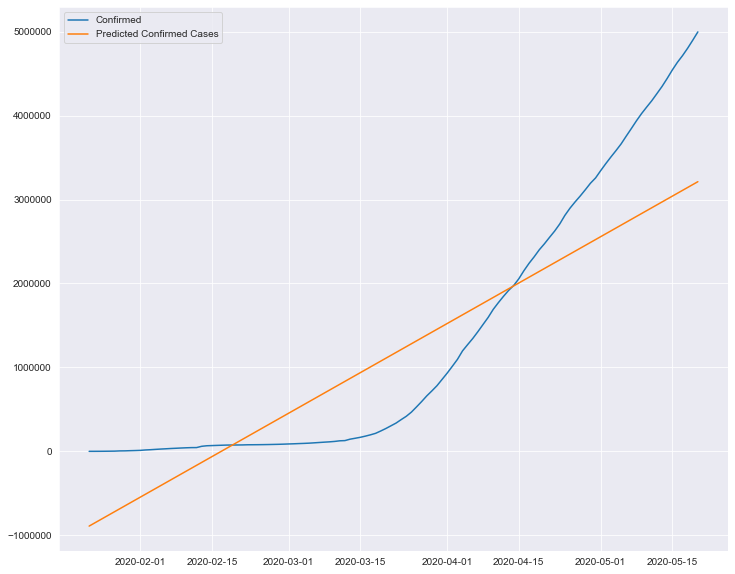

In [52]:
plt.figure(figsize=(12,10))
plt.plot(covid_datewise['Confirmed'], label = 'Confirmed')
plt.plot(covid_datewise.index, predicted_value_all, label = 'Predicted Confirmed Cases')

plt.legend()
plt.show()

### FBProphet - ARIMA (Auto Regressive Moving Average)

* AR - P Property (Past Trends of Data to Predict Future Values)
* I - D Property (Seasonality in Sales)
* MA - Q Property 

In [53]:
from fbprophet import Prophet

In [54]:
prophet_model = Prophet(interval_width= 0.95, weekly_seasonality= True, daily_seasonality= True)

In [55]:
#3 Input data Prepration 
prophet_confirmed = pd.DataFrame(zip(list(covid_datewise.index), list(covid_datewise['Confirmed'])), columns= ['ds', 'y'])

In [56]:
prophet_confirmed

,ds,y
0,2020-01-22,555.0
1,2020-01-23,653.0
2,2020-01-24,941.0
3,2020-01-25,1438.0
4,2020-01-26,2118.0
...,...,...
115,2020-05-16,4634068.0
116,2020-05-17,4713620.0
117,2020-05-18,4801943.0
118,2020-05-19,4897492.0


In [57]:
## Training of Algorithm
prophet_model.fit(prophet_confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [58]:
# Generate 18 More Date for Forecasting 
forecast_c = prophet_model.make_future_dataframe(periods= 18)

In [59]:
forecast_c

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
133,2020-06-03
134,2020-06-04
135,2020-06-05
136,2020-06-06


In [60]:
confirmed_forecast = prophet_model.predict(forecast_c)

In [61]:
confirmed_forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-6.343827e+03,-2.785706e+04,1.435745e+04
1,2020-01-23,-4.756522e+03,-2.625050e+04,1.498683e+04
2,2020-01-24,2.264610e+03,-1.833387e+04,2.306919e+04
3,2020-01-25,5.780148e+03,-1.514370e+04,2.788298e+04
4,2020-01-26,5.523393e+03,-1.386608e+04,2.682537e+04
...,...,...,...,...
133,2020-06-03,6.127625e+06,5.969563e+06,6.285405e+06
134,2020-06-04,6.211616e+06,6.039423e+06,6.386595e+06
135,2020-06-05,6.301041e+06,6.102134e+06,6.493256e+06
136,2020-06-06,6.386960e+06,6.167669e+06,6.596653e+06


Figure(720x432)


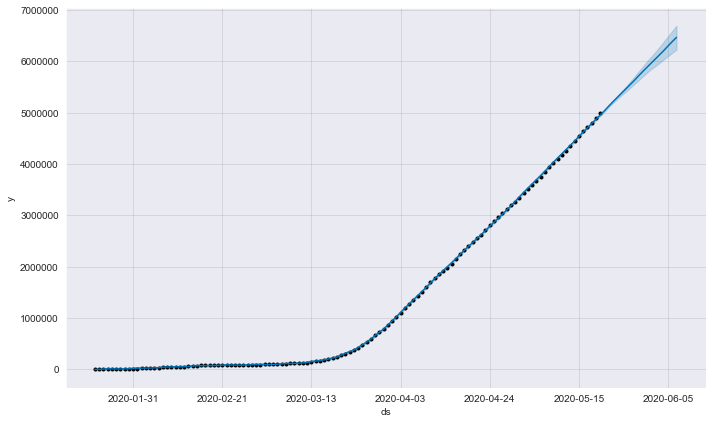

In [62]:
print(prophet_model.plot(confirmed_forecast))

In [63]:
## Root Mean Squared Error
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(covid_datewise ["Confirmed"],confirmed_forecast['yhat'].head(covid_datewise.shape[0])))
print("Root Mean Squared Error for Prophet Model: ",np.sqrt(mean_squared_error(covid_datewise["Confirmed"],confirmed_forecast['yhat'].head(covid_datewise.shape[0]))))

Root Mean Squared Error for Prophet Model:  10735.847812901153


In [64]:
lin_reg.score(np.array(test_ml['Confirmed']).reshape(-1,1), predicted_value)

-1703384783174.4136

### RNN - Recurrent Neural Network

In [65]:
## RNN - LSTM - Times Series Forecasting
# Neural Network with Memory 
# Output will depend upon features (X) and past memory (logic gates that stores part memory)

In [66]:
# Sequential Arrangement of Neural Network
from keras.models import Sequential
# LSTM - Part of RNN - ANN with Backpropogation 
# dense - ANN
from keras.layers import LSTM, Dense
# To avoid overfitting
from keras.layers import Dropout
# Data Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Date Generator using Keras Package
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator 

Using TensorFlow backend.


In [67]:
covid19

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
27161,27162,2020-05-20,Yucatan,Mexico,2020-05-21 02:32:48,1244.0,97.0,797.0
27162,27163,2020-05-20,Yukon,Canada,2020-05-21 02:32:48,11.0,0.0,11.0
27163,27164,2020-05-20,Yunnan,Mainland China,2020-05-21 02:32:48,185.0,2.0,183.0
27164,27165,2020-05-20,Zacatecas,Mexico,2020-05-21 02:32:48,212.0,27.0,134.0


In [68]:
data = covid19[covid19['Country/Region'] == 'India']

In [69]:
data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
430,431,2020-01-30,NaN,India,1/30/20 16:00,1.0,0.0,0.0
491,492,2020-01-31,NaN,India,1/31/2020 23:59,1.0,0.0,0.0
547,548,2020-02-01,NaN,India,1/31/2020 8:15,1.0,0.0,0.0
607,608,2020-02-02,NaN,India,2020-02-02T06:03:08,2.0,0.0,0.0
672,673,2020-02-03,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...
25279,25280,2020-05-16,NaN,India,2020-05-17 02:32:32,90648.0,2871.0,34224.0
25656,25657,2020-05-17,NaN,India,2020-05-18 02:32:21,95698.0,3025.0,36795.0
26033,26034,2020-05-18,NaN,India,2020-05-19 02:32:18,100328.0,3156.0,39233.0
26410,26411,2020-05-19,NaN,India,2020-05-20 02:32:19,106475.0,3302.0,42309.0


In [70]:
data = data.loc[:, ['ObservationDate', 'Confirmed']]

In [71]:
data

,ObservationDate,Confirmed
430,2020-01-30,1.0
491,2020-01-31,1.0
547,2020-02-01,1.0
607,2020-02-02,2.0
672,2020-02-03,3.0
...,...,...
25279,2020-05-16,90648.0
25656,2020-05-17,95698.0
26033,2020-05-18,100328.0
26410,2020-05-19,106475.0


In [72]:
data = data.groupby('ObservationDate')[['Confirmed']].max().reset_index()

In [73]:
data

,ObservationDate,Confirmed
0,2020-01-30,1.0
1,2020-01-31,1.0
2,2020-02-01,1.0
3,2020-02-02,2.0
4,2020-02-03,3.0
...,...,...
107,2020-05-16,90648.0
108,2020-05-17,95698.0
109,2020-05-18,100328.0
110,2020-05-19,106475.0


In [74]:
dataset = data.drop("ObservationDate", axis = 1)

In [75]:
dataset

,Confirmed
0,1.0
1,1.0
2,1.0
3,2.0
4,3.0
...,...
107,90648.0
108,95698.0
109,100328.0
110,106475.0


In [76]:
data = np.array(dataset).reshape(-1, 1)

In [77]:
data

array([[1.00000e+00],
       [1.00000e+00],
       [1.00000e+00],
       [2.00000e+00],
       [3.00000e+00],
       [3.00000e+00],
       [3.00000e+00],
       [3.00000e+00],
       [3.00000e+00],
       [3.00000e+00],
       [3.00000e+00],
       [3.00000e+00],
       [3.00000e+00],
       [3.00000e+00],
       [3.00000e+00],
       [3.00000e+00],
       [3.00000e+00],
       [3.00000e+00],
       [3.00000e+00],
       [3.00000e+00],
       [3.00000e+00],
       [3.00000e+00],
       [3.00000e+00],
       [3.00000e+00],
       [3.00000e+00],
       [3.00000e+00],
       [3.00000e+00],
       [3.00000e+00],
       [3.00000e+00],
       [3.00000e+00],
       [3.00000e+00],
       [3.00000e+00],
       [5.00000e+00],
       [5.00000e+00],
       [2.80000e+01],
       [3.00000e+01],
       [3.10000e+01],
       [3.40000e+01],
       [3.90000e+01],
       [4.30000e+01],
       [5.60000e+01],
       [6.20000e+01],
       [7.30000e+01],
       [8.20000e+01],
       [1.02000e+02],
       [1.

In [78]:
train_data = dataset[:len(dataset)-5]
# For validation take last 5 Values
test_data = dataset[len(dataset)-5:]

In [79]:
## Data Preprocessing
## scaling large samples into equal range of (0,1)
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [91]:
n_input = 5
# X (days - 1)
n_feature = 1

In [92]:
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=10)

In [93]:
generator

In [94]:
## Lstm Model 
lstm_model = Sequential() 
# layer - 1 : Input Layer
# units = no of neurons , backpropogation: return_sequences,  
lstm_model.add(LSTM(units = 64, return_sequences= True, input_shape = (n_input, n_feature)))
# Avoid overfitting of model 0.2 = 20%
lstm_model.add(Dropout(0.2))
# Hidden Layer - I
lstm_model.add(LSTM(units = 64, return_sequences= True))
lstm_model.add(Dropout(0.2))
# Hidden Layer - II
lstm_model.add(LSTM(units = 64))
lstm_model.add(Dropout(0.2))
# Ouput layer
# In regression : last layer neuron = 1 
lstm_model.add(Dense(units = 1))

## Optimization - adam : gradient + SGD & Loss Function 
# Optimizers - minimize the residual value
lstm_model.compile(optimizer = 'adam', loss='mean_squared_error')

In [95]:
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 20, 64)            16896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 20, 64)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 20, 64)            33024     
_________________________________________________________________
dropout_5 (Dropout)          (None, 20, 64)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [96]:
# Total Iterations for Training
lstm_model.fit(generator, epochs = 53)

Epoch 1/53
9/9 [==============================] - 1s 111ms/step - loss: 0.1130
Epoch 2/53
9/9 [==============================] - 0s 16ms/step - loss: 0.0173
Epoch 3/53
9/9 [==============================] - 0s 16ms/step - loss: 0.0077
Epoch 4/53
9/9 [==============================] - 0s 16ms/step - loss: 0.0169
Epoch 5/53
9/9 [==============================] - 0s 16ms/step - loss: 0.0087
Epoch 6/53
9/9 [==============================] - 0s 17ms/step - loss: 0.0052
Epoch 7/53
9/9 [==============================] - 0s 16ms/step - loss: 0.0070
Epoch 8/53
9/9 [==============================] - 0s 15ms/step - loss: 0.0043
Epoch 9/53
9/9 [==============================] - 0s 17ms/step - loss: 0.0020
Epoch 10/53
9/9 [==============================] - 0s 17ms/step - loss: 0.0018
Epoch 11/53
9/9 [==============================] - 0s 16ms/step - loss: 0.0036
Epoch 12/53
9/9 [==============================] - 0s 17ms/step - loss: 0.0045
Epoch 13/53
9/9 [==============================] - 0s 18ms/s

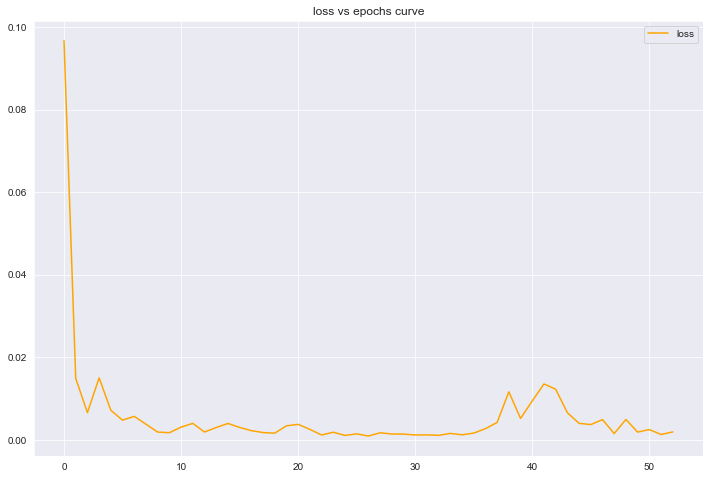

In [99]:
pd.DataFrame(lstm_model.history.history).plot(title="loss vs epochs curve", color='orange', figsize=(12,8))

In [100]:
lstm_predictions_scaled = []

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_feature))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)
prediction = pd.DataFrame(scaler.inverse_transform(lstm_predictions_scaled))
np.round(prediction)

,0
0,84131.0
1,87338.0
2,90379.0
3,93237.0
4,95915.0
